In [36]:
import numpy as np
import pandas as pd
import os
from sklearn.metrics import classification_report
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tqdm import tqdm

In [37]:
class_names=['Gun','Knife','Money','Phone']
class_names_label= {class_name:i for i,class_name in enumerate(class_names)}

nb_classes=len(class_names)

print(class_names_label)

IMAGE_SIZE=(150,150)

{'Gun': 0, 'Knife': 1, 'Money': 2, 'Phone': 3}


In [38]:
def load_data():
    DIRECTORY=r"C:\Misc"
    CATEGORY= ["Seg_train","Seg_test"]
    
    output=[]
    
    for category in CATEGORY:
        path=os.path.join(DIRECTORY, category)
        images=[]
        labels=[]
        
        print("Loading {}".format(category))
        
        for folder in os.listdir(path):
            label=class_names_label[folder]
            
            for file in os.listdir(os.path.join(path,folder)):
                
                img_path=os.path.join(os.path.join(path,folder),file)
                
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
                image=cv2.resize(image,IMAGE_SIZE)
                
                images.append(image)
                labels.append(label)
                
                
        images=np.array(images,dtype='float32')
        labels=np.array(labels,dtype='int32')
        
        output.append((images,labels))
        
    return output

In [39]:
(train_images,train_labels),(test_images,test_labels)=load_data()

Loading Seg_train
Loading Seg_test


In [40]:
train_images,train_labels=shuffle(train_images,train_labels,random_state=25)

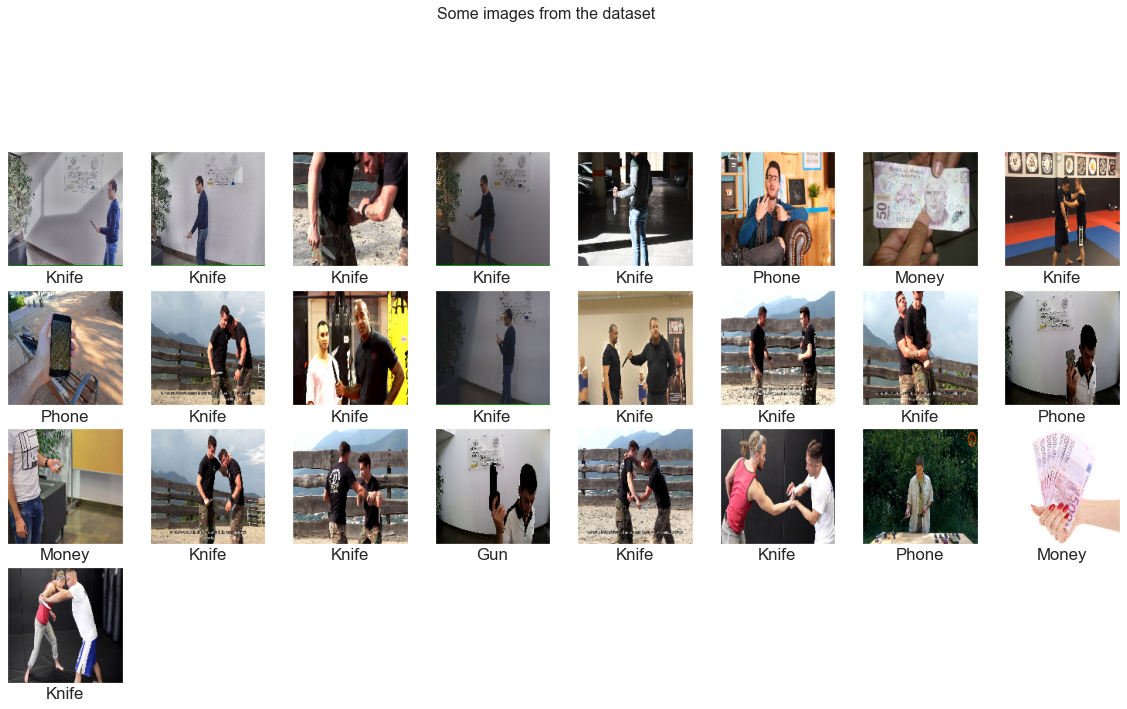

In [41]:
def display_examples(class_names,images,labels):
    
    figsize=(20,20)
    fig= plt.figure(figsize=figsize)
    fig.suptitle("Some images from the dataset",fontsize=16)
    
    for i in range(25):
        plt.subplot(8,8,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        
        plt.imshow(images[i].astype(np.uint8))
        plt.xlabel(class_names[labels[i]])
        
    plt.show()
display_examples(class_names,train_images,train_labels)

In [42]:
model=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(6,activation=tf.nn.softmax)
    
])

In [43]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
history=model.fit(train_images,train_labels,batch_size=128,epochs=4,validation_split=0.2)

Epoch 1/4
8/8 [==============================] - 14s 2s/step - loss: 483.7721 - accuracy: 0.5047 - val_loss: 62.5229 - val_accuracy: 0.2158
Epoch 2/4
8/8 [==============================] - 12s 2s/step - loss: 11.0035 - accuracy: 0.6075 - val_loss: 2.7252 - val_accuracy: 0.6722
Epoch 3/4
8/8 [==============================] - 12s 2s/step - loss: 0.8846 - accuracy: 0.7809 - val_loss: 1.0751 - val_accuracy: 0.7510
Epoch 4/4
8/8 [==============================] - 12s 1s/step - loss: 0.4021 - accuracy: 0.9263 - val_loss: 1.0080 - val_accuracy: 0.7759


In [45]:
def plot_accuracy_loss(history):
    
    
    fig=plt.figure(figsize=(10,5))
    
    
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--',label='acc')
    plt.plot(history.history['val_accuracy'],'ro--',label='val_acc')
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--',label='loss')
    plt.plot(history.history['val_loss'],'ro--',label='val_loss')
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()
    
    plt.show()

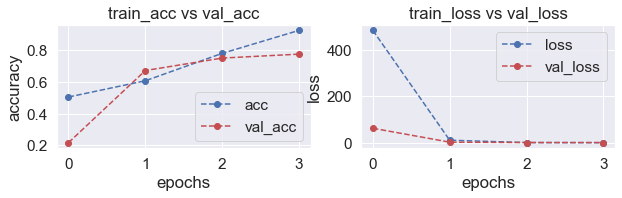

In [46]:
plot_accuracy_loss(history)

In [47]:
test_loss=model.evaluate(test_images,test_labels)

17/17 [==============================] - 2s 124ms/step - loss: 0.5608 - accuracy: 0.8689


In [48]:
predictions=model.predict(test_images)
pred_labels=np.argmax(predictions,axis=1)
print(classification_report(test_labels,pred_labels))

17/17 [==============================] - 2s 123ms/step
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        44
           1       0.80      0.97      0.88       213
           2       0.96      0.81      0.88       234
           3       0.82      0.86      0.84        43
           4       0.00      0.00      0.00         0

    accuracy                           0.87       534
   macro avg       0.70      0.67      0.68       534
weighted avg       0.88      0.87      0.87       534



C:\Users\sihus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sihus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sihus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
